# Citations over time

In [71]:
# You can ignore this cell, it just imports the different modules you need :smile:
from glob import glob
from IPython.display import display # Use this to display multiple outputs within a cell
import itertools as it
import json
import matplotlib.pylab as plt
import matplotlib.ticker as ticker
%matplotlib inline
import numpy as np
import os
import pandas as pd
import requests
import seaborn as sns
sns.set_style('white')
sns.set_context('notebook',font_scale=1.5)
from scipy.stats import ttest_ind, ttest_rel, pearsonr, spearmanr, linregress, ttest_1samp
import statsmodels.api as sm
from statsmodels.sandbox.stats.multicomp import fdrcorrection0 as fdr
import sys

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Get the data

In [30]:
# Taken from a question on StackOverflow:
# https://stackoverflow.com/questions/16694907/how-to-download-large-file-in-python-with-requests-py

def download_file(url, filename):
    local_filename = '../data/{}'.format(filename)
    # NOTE the stream=True parameter
    r = requests.get(url, stream=True)
    with open(local_filename, 'wb') as f:
        for chunk in r.iter_content(chunk_size=1024): 
            if chunk: # filter out keep-alive new chunks
                f.write(chunk)
                #f.flush() commented by recommendation from J.F.Sebastian
    print(local_filename)

In [31]:
eupmc_githubdotcom_f_name = 'eupmc_results_githubdotcom.json'
eupmc_githubdotcom_url = 'https://www.dropbox.com/s/4iwwb3mr46pdx2h/{}?dl=1'.format(eupmc_githubdotcom_f_name)

eupmc_zenodo_f_name = 'eupmc_results_zenodo.json'
eupmc_zenodo_url = 'https://www.dropbox.com/s/r7132d9utv17l8j/{}?dl=1'.format(eupmc_zenodo_f_name)

eupmc_figshare_f_name = 'eupmc_results_figshare.json'
eupmc_figshare_url = 'https://www.dropbox.com/s/yolaxezf4yy52fv/{}?dl=1'.format(eupmc_figshare_f_name)

file_url_dict = {}

file_url_dict['githubdotcom'] = (eupmc_githubdotcom_f_name, eupmc_githubdotcom_url)
file_url_dict['zenodo'] = (eupmc_zenodo_f_name, eupmc_zenodo_url)
file_url_dict['figshare'] = (eupmc_figshare_f_name, eupmc_figshare_url)


In [32]:
if not os.path.isdir('../data'):
    os.path.makedirs('../data')

for term, (f_name, url) in file_url_dict.items():
    
    if not os.path.isfile('../data/{}'.format(f_name)):
        download_file(url, f_name)
    else:
        print('eupmc {} data already downloaded'.format(term))

eupmc githubdotcom data already downloaded
eupmc zenodo data already downloaded
../data/eupmc_results_figshare.json


## Term occurance over time

In [37]:
def read_in_data(f_name):

    with open('../data/{}'.format(f_name), encoding="utf8") as f:
        data = json.load(f)
          
    pub_dates = [ dt.datetime.strptime(article['firstPublicationDate'][0], '%Y-%m-%d') 
              for article 
              in data ]

    df = pd.DataFrame({'pub-date' : pub_dates})
    
    return df

In [248]:
def plot_histogram(df, term):
    
    df.columns = [term]
    
    fig, ax = plt.subplots()

    # Helpful command from
    # https://stackoverflow.com/questions/27365467/can-pandas-plot-a-histogram-of-dates
    ax = df.groupby([df[term].dt.year, 
                     df[term].dt.month]).count().plot(kind="bar",
                                                            ax=ax)

    ax.set_xlabel('Date')
    
    labels = []
    
    for label in ax.xaxis.get_ticklabels():
        x = label.get_text()
        x = x[1:-1]
        (year, month) = x.split(',')
        labels += [year]
        if month == ' 1':
            label.set_visible(True)
            label.set_rotation(45)
        else:
            label.set_visible(False)
            
    ax.set_xticklabels(labels)
    sns.despine()

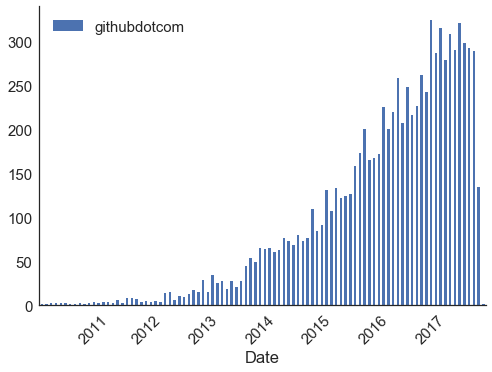

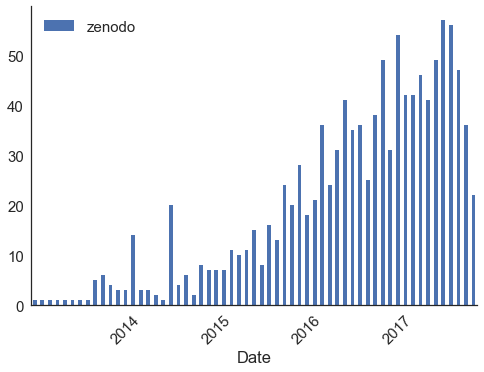

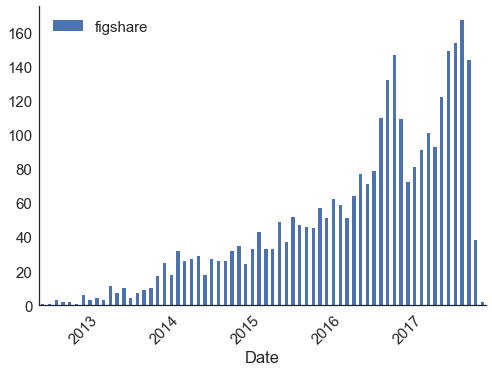

In [250]:
for term, (f_name, url) in file_url_dict.items():
    df = read_in_data(f_name)
    plot_histogram(df, term)